<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/3_1_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습

 비지도 학습에서 어러운 일은 알고리즘이 뭔가 유용한 것을 학습했는지 평가하는 것이다. 어떤 모델이 잘하고 있는지는 직접 확인하는 것이 유일한 방법일때가 많다.
 이런 이유로 비지도 학습 알고리즘은 데이터를 잘 이해하고 싶을 때, 탐색적 분석 단계에서 많이 사용한다. 또한 전처리 단계에서 사용하여 비지도 학습의 결과로 얻어진 새롭게 표현된 데이터를 사용해 학습하면 지도의 정확도를 높이기도 하며 메모리와 시간을 절약하기도 한다.

비지도는 주로 **변환**과 **군집** 학습으로 나눌 수 있다.

\
### 비지도 변환
 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘이다. 비지도 변환이 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소이다. 예로는, 시각화를 위해 데이터셋을 2차원으로 변경하는 경우이다.

 \
 ### 군집 알고리즘
데이터를 비슷한 것끼리 그룹으로 묶는 것. 소셜 미디어 사이트에 사진을 업로드하는 예를 생각해보자. 업로드한 사람을 분류하려면 같은 사람이 찍힌 사진을 같은 그룹으로 묶을 수 있다. 그러나 사이트는 사진 속 사람이 누군지, 전체 사진 앨범에 얼마나 많은 사람이 있는지 알지 못한다. 가능한 방법은 사진에 나타난 모든 얼굴을 추출해서 비슷한 얼굴로 그룹을 짓는 것이다. 이 얼굴들이 같은 사람의 얼국이라면 이미지들을 그룹으로 잘 묶는 것이다.

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=adec4bd45fce6c92b2ec0d19fbbcdbd0308607d0b507da10fa942fe59959923c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## 3.3 데이터 전처리와 스케일 조정
신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감하다. 그래서 보통 이런 알고리지즘들에 맞게 데이터의 특성 값으 조정한다. 보통 특성마다 스케일을 조정해서 데이터를 변경한다.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(15,10)})

from pandas.core.common import random_state

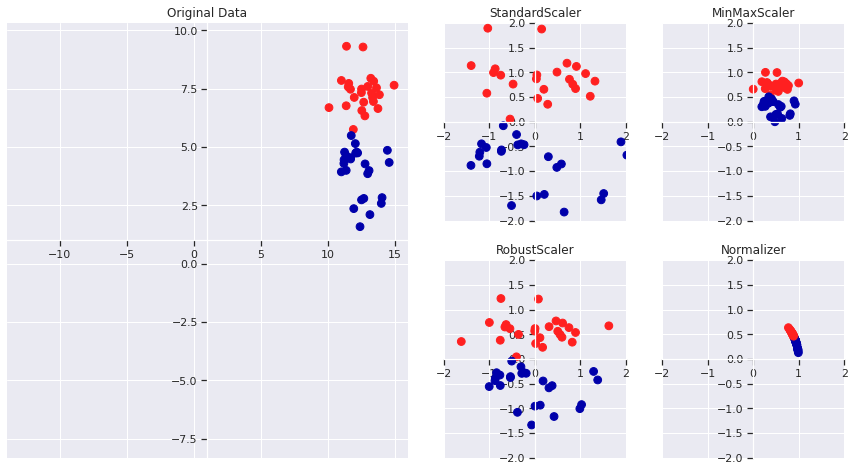

In [3]:
mglearn.plots.plot_scaling()

## 3.3.1 여러가지 잔처리 방법

**첫번째 그래프**는 두 개의 특성을 인위적으로 만든 이진 분류 데이터섹이다.
첫번째 특성(x 축의 값)은 10과 15 사이에 있다. 두 번째 특성 (y 축의 값)은 1과 9 사이에 있다.
오른쪽 네 그래프는 데이터를 기준이 되는 범위로 변환하는 네 가지 방법을 보여준다.

**StandardScaler** 각 특성에 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다. 그러나 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지는 않는다.

**RobustScaler** 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 standar와 비슷하다. 하지만 평균과 분산 대신 중간 값과 사분위 값을 사용한다. 이런 방식 때문에 Robust는 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않다. 이런 이상 데이터를 이상치(outlier)라 하며 다른 스케일 조정 기법에서는 문제가 될 수 있다.

**MinMaxScaler** 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경한다. 2차원 테이터셋일 경우 모든 데이터가 x축의 0과 1, y축과 0과 1 사이의 사각 영역에 담기게 된다.

**Normalizer** 매우 다른 스케일 조정 기법이다. 이 방식은 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 다른 말로 하면 지름이 1인 원(3차원 일 땐 구)에 데이터 포인트를 투영한다. 이 말은 각 게이터 포인트가 다른 비율로(길이에 반비례하여) 스케일이 조정된다는 뜻이다. 이런 정규화는 특성 벡더의 길이는 상관 없고 데이터의 방향 또는 각도 만이 중요할 때 많이 사용한다.


## 3.3.2 데이터 변환 적용

scikit-learn을 사용해 적용해보자.

- 데이터 : cencer
- 데이터셋 커널 : SVM
- 데이터 전처리 : MinMaxScaler



In [8]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [9]:
# 우선 전처리가 구현된 파이썬 클래스를 임포트 하고 객체를 생성
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

# fit 메서드에 훈련 데이터 적용.
# MinMaxScaler의 fit 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값 계산
# 스케일 객체는 fit 메서드를 호출할 때 훈련 데이터(X_train)만 넘겨주며 y_train은 사용하지 않는다.
scaler.fit(X_train)

MinMaxScaler()

In [13]:
# 훈련 데이터의 스케일을 조정하려면 스케일 객체의 transform 메서드를 사용한다.

# 데이터 변환
X_train_scaler = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력한다.
print("변환된 후 크기:",X_train_scaler.shape)
print("스케일 조정 전 특성별 최솟값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최댓값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최솟값:\n", X_train_scaler.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n", X_train_scaler.max(axis=0))

## 변환된 배열의 크기는 이전 데이터와 동일하다

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
# SVM을 적용하려면 테스트 데이터셋트도 변환 해야 한다.

# 테스트 데이터 변환
X_test_scaler = scaler.transform(X_test)
print("스케일 조정 후 특성별 최솟값:\n", X_test_scaler.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n", X_test_scaler.max(axis=0))

스케일 조정 후 특성별 최솟값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


 특이하게도 스테일을 조정한 테스트셋의 최솟값과 최댓값이 0과 1이 아니다. 일부 특성은 0~1 범위를 벗어났다. MinMaxScaler는(그리고 다른 모든 스케일 모델도) 항상 훈련세트와 테스트 세트에 같은 변환을 적용해야 한다. transform 메서드는 테스스셋의 최솟값과 범윌ㄹ 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눈다.

## 3.3.3 Quantile Transformer 와 PowerTransformer

scikit 0.19.0 버전에 Quantile 변환기가 추가 되었다. Quantile은 기본적으로 1,000개의 분위를 사용하여 데이터를 균등하게 분포시킨다. RobustScaler와 비슷하게 이상치에 민감하지 많으며 전체 데이터를 0과 1사이로 압축한다.

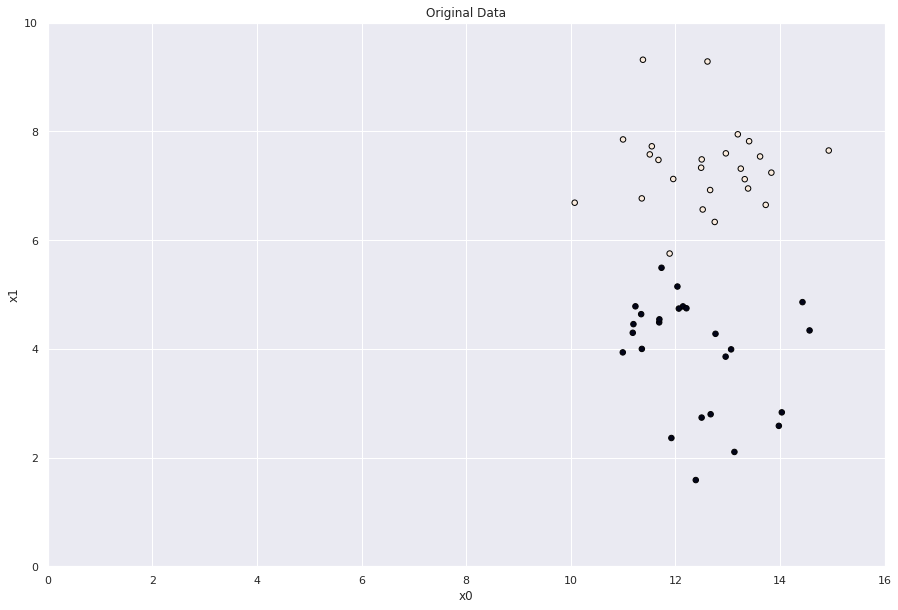

In [26]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

# 데이터를 이용하며 산점도
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0,16) # X 좌표 범위
plt.xlabel('x0')
plt.ylim(0, 10) # y 좌표 범위
plt.ylabel('x1')
plt.title('Original Data')
plt.show()


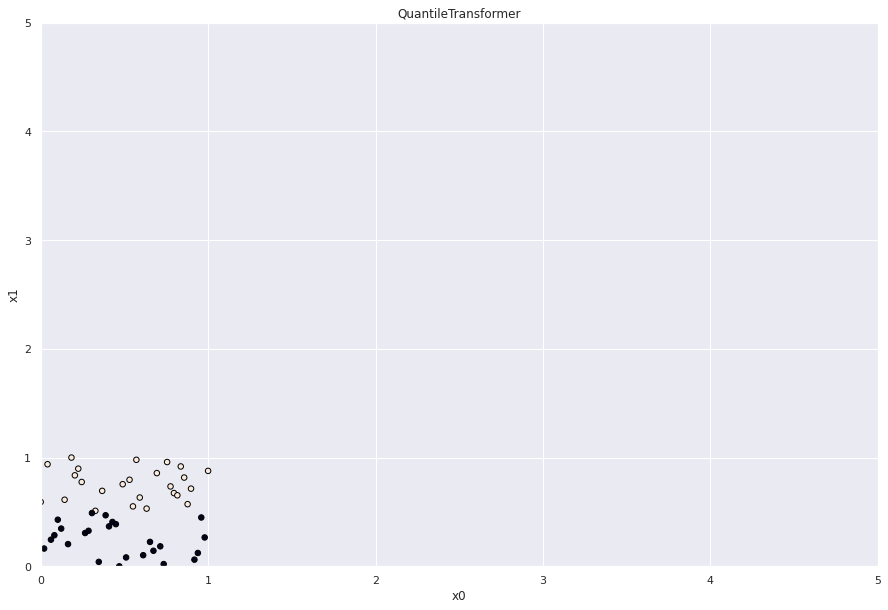

In [39]:
# QuantileTransformer를 적용해 어떻게 스케일이 변환되는지 확인해보자.

scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X) # 0-1 사이 값으로 변환

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0,5) # X 좌표 범위
plt.xlabel('x0')
plt.ylim(0, 5) # y 좌표 범위
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

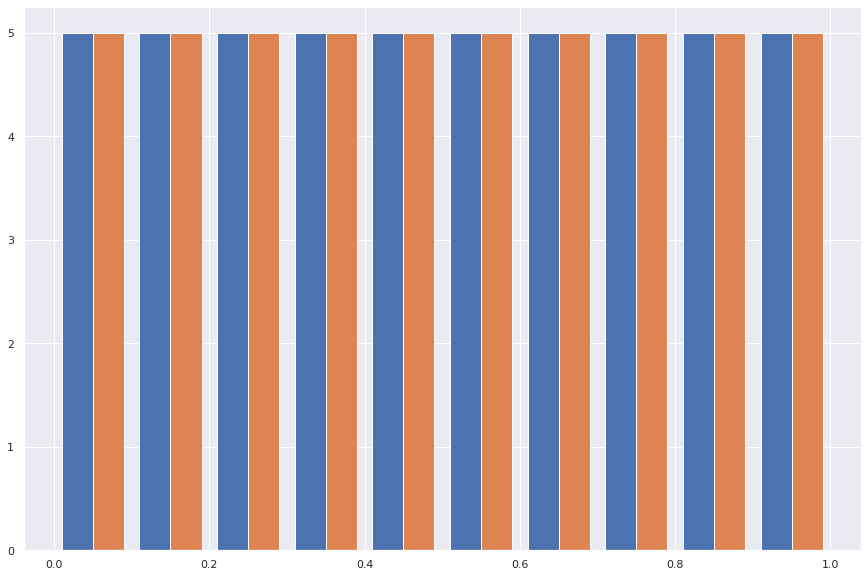

In [34]:
# 변환된 데이터의 히스토그램을 그려보면 균등분포를 쉽게 확인할 수 있다.

plt.hist(X_trans)
plt.show()

In [40]:
# Quantile 의 분위 수는 n_quantiles 매개변수에서 설정할 수 있으며 기본값은 1,000 이다.
# scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위 값이 들어 있으므로 이 속성의 크기는 (n_quantiles, n_features)이다.

print(scaler.quantiles_.shape)

(50, 2)
